### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


##Импорт библиотек

In [ ]:
# Подключение утилит для to_categorical
# Подключение библиотеки для генерации случайных чисел
import random

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение класса для работы с изображением
from PIL import Image
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import (BatchNormalization, Conv2D, Dense,
                                     Dropout, Flatten, MaxPooling2D)
# Импорт необходимых модулей
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Вывод изображения в ноутбуке, а не в консоли или файле

%matplotlib inline


Загрузка датасета

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Вывод изображений

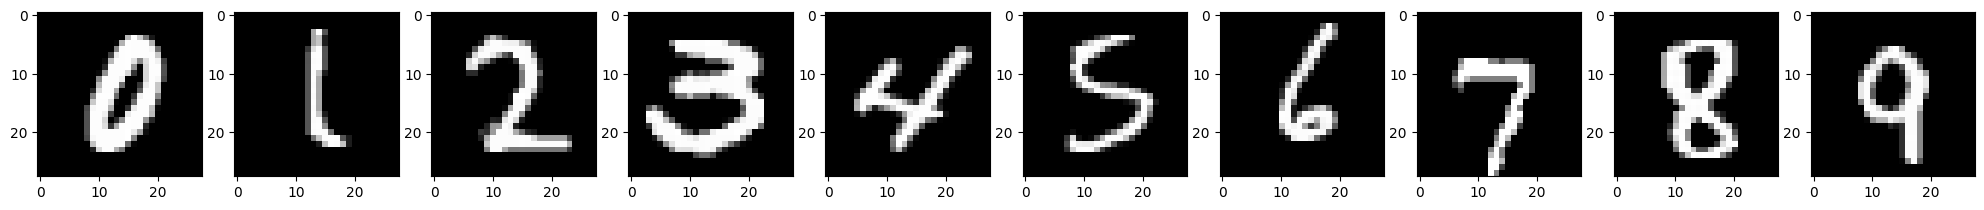

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

Изменение размерностей данных, преобразование выборок и просмотр форматов выборок

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


Нормализация данных, создание, компиляция и обучение модели

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 151ms/step - accuracy: 0.8911 - loss: 0.3595 - val_accuracy: 0.9854 - val_loss: 0.1235
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 150ms/step - accuracy: 0.9815 - loss: 0.0626 - val_accuracy: 0.9830 - val_loss: 0.0540
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.9896 - val_loss: 0.0334
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accuracy: 0.9869 - val_loss: 0.0398
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 148ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9915 - val_loss: 0.0297
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9905 - val_loss: 0.0320
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 147ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9909 - val_loss: 0.0310
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 146ms/step - accuracy: 0.9939 - loss: 0

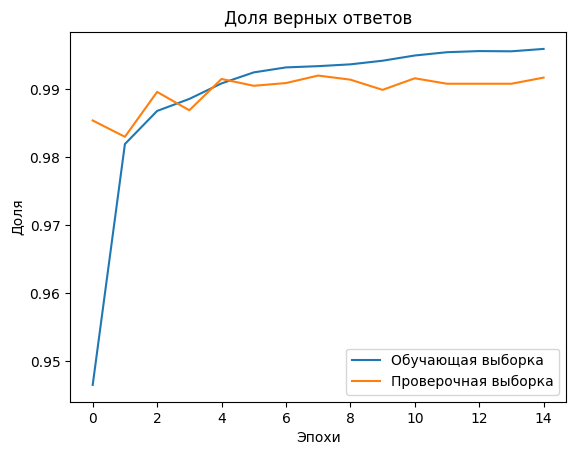

In [ ]:
# Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Создание модели
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Построение графика обучения
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.title('Доля верных ответов')
plt.xlabel('Эпохи')
plt.ylabel('Доля')
plt.legend()
plt.show()